# CNN

### 1. MNIST

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from PIL import Image
import numpy as np

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# 轉換成CNN可接受的維度
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

### 標準化 for CNN

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### One Hot

In [6]:
# convert class vectors to binary class matrices, one-hot
y_train_ohe = keras.utils.to_categorical(y_train, num_classes)
y_test_ohe = keras.utils.to_categorical(y_test, num_classes)

In [7]:
y_test.shape

(10000,)

In [8]:
y_test[1]

2

In [12]:
# np array not Series
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [7]:
# 標記是6的
index = np.where(y_train==6)[0]
y_train6 = np.zeros(len(x_train))
y_train6[index] = 1

index_test = np.where(y_test==6)[0]
y_test6 = np.zeros(len(x_test))
y_test6[index_test] = 1

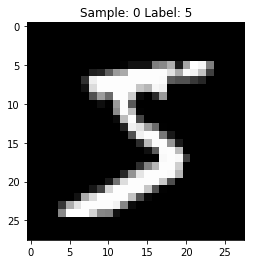

In [10]:
def display_img(num):
    # print(y_train[num])
    label = y_train_ohe[num].argmax(axis=0)
    image = x_train[num].reshape([28, 28])
    plt.title('Sample: %d Label: %d' % (num, label))
    plt.imshow(image, cmap='gray')
    
display_img(0)

### DNN model/ MLP
分辨六出來

In [8]:
flat_img = img_rows * img_cols
model_MLP = Sequential()
model_MLP.add(Dense(256, input_dim=flat_img, activation='relu'))
model_MLP.add(Dense(1, activation='sigmoid'))
model_MLP.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# 將 training 的 input 資料轉為2維(照片被拉直)
X_train_2D = x_train.reshape(60000, 28 * 28).astype('float32')
X_test_2D = x_test.reshape(10000, 28 * 28).astype('float32')
X_train_2D.shape

(60000, 784)

In [10]:
# Split the dataset into the training set and the validation set
# X_train_2D的每個像素都是0-255, 將其縮小成0-1
x_Train_norm = X_train_2D / 255
x_Test_norm = X_test_2D / 255

In [11]:
train_history_MLP = model_MLP.fit(x=x_Train_norm, y=y_train6, validation_split=0.2, epochs=10, batch_size=800, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 12us/step - loss: 0.5155 - acc: 0.8900 - val_loss: 0.3558 - val_acc: 0.9025
Epoch 2/10
48000/48000 [==============================] - 0s 9us/step - loss: 0.3226 - acc: 0.9011 - val_loss: 0.3047 - val_acc: 0.9025
Epoch 3/10
48000/48000 [==============================] - 0s 9us/step - loss: 0.2985 - acc: 0.9011 - val_loss: 0.2845 - val_acc: 0.9025
Epoch 4/10
48000/48000 [==============================] - 0s 9us/step - loss: 0.2771 - acc: 0.9011 - val_loss: 0.2608 - val_acc: 0.9025
Epoch 5/10
48000/48000 [==============================] - 0s 9us/step - loss: 0.2510 - acc: 0.9011 - val_loss: 0.2310 - val_acc: 0.9025
Epoch 6/10
48000/48000 [==============================] - 0s 9us/step - loss: 0.2191 - acc: 0.9011 - val_loss: 0.1968 - val_acc: 0.9025
Epoch 7/10
48000/48000 [==============================] - 0s 9us/step - loss: 0.1871 - acc: 0.9011 - val_loss: 0.1675 - val_acc: 0.90

#### 分辨0到9

In [43]:
model_MLP2 = Sequential()
model_MLP2.add(Dense(256, input_dim=flat_img, activation='relu'))
model_MLP2.add(Dense(128, activation='relu'))
model_MLP2.add(Dense(10, activation='softmax'))
model_MLP2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history_MLP2 = model_MLP2.fit(x=x_Train_norm, y=y_train_ohe, validation_split=0.2, epochs=10, batch_size=800, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 15us/step - loss: 2.1994 - acc: 0.3630 - val_loss: 1.9279 - val_acc: 0.5463
Epoch 2/10
48000/48000 [==============================] - 0s 10us/step - loss: 1.4387 - acc: 0.6171 - val_loss: 1.0047 - val_acc: 0.7263
Epoch 3/10
48000/48000 [==============================] - 0s 10us/step - loss: 0.8534 - acc: 0.7500 - val_loss: 0.7014 - val_acc: 0.7997
Epoch 4/10
48000/48000 [==============================] - 0s 10us/step - loss: 0.6648 - acc: 0.7986 - val_loss: 0.5772 - val_acc: 0.8310
Epoch 5/10
48000/48000 [==============================] - 0s 10us/step - loss: 0.5670 - acc: 0.8293 - val_loss: 0.5001 - val_acc: 0.8567
Epoch 6/10
48000/48000 [==============================] - 0s 10us/step - loss: 0.5016 - acc: 0.8512 - val_loss: 0.4470 - val_acc: 0.8728
Epoch 7/10
48000/48000 [==============================] - 0s 10us/step - loss: 0.4508 - acc: 0.8683 - val_loss: 0.4073 - val_acc

### 用sparse當loss, 這樣就不用自行做one hot

In [48]:
model_MLP3 = Sequential()
model_MLP3.add(Dense(256, input_dim=flat_img, activation='relu'))
model_MLP3.add(Dense(128, activation='relu'))
model_MLP3.add(Dense(10, activation='softmax'))
model_MLP3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history_MLP3 = model_MLP3.fit(x=x_Train_norm, y=y_train, validation_split=0.3, epochs=10, batch_size=100, verbose=1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 2s 39us/step - loss: 1.1451 - acc: 0.6777 - val_loss: 0.5566 - val_acc: 0.8426
Epoch 2/10
42000/42000 [==============================] - 1s 32us/step - loss: 0.4700 - acc: 0.8653 - val_loss: 0.4039 - val_acc: 0.8791
Epoch 3/10
42000/42000 [==============================] - 1s 32us/step - loss: 0.3821 - acc: 0.8891 - val_loss: 0.3517 - val_acc: 0.8954
Epoch 4/10
42000/42000 [==============================] - 1s 32us/step - loss: 0.3447 - acc: 0.9004 - val_loss: 0.3259 - val_acc: 0.9038
Epoch 5/10
42000/42000 [==============================] - 1s 32us/step - loss: 0.3172 - acc: 0.9082 - val_loss: 0.2995 - val_acc: 0.9126
Epoch 6/10
42000/42000 [==============================] - 1s 33us/step - loss: 0.2946 - acc: 0.9147 - val_loss: 0.2847 - val_acc: 0.9157
Epoch 7/10
42000/42000 [==============================] - 1s 33us/step - loss: 0.2735 - acc: 0.9207 - val_loss: 0.2656 - val_acc

### 作圖

In [12]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

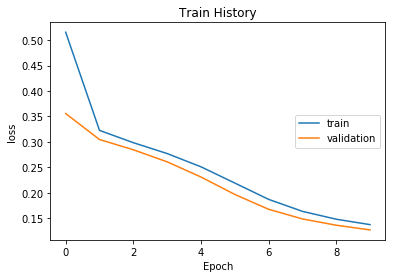

In [13]:
show_train_history(train_history_MLP, 'loss', 'val_loss')

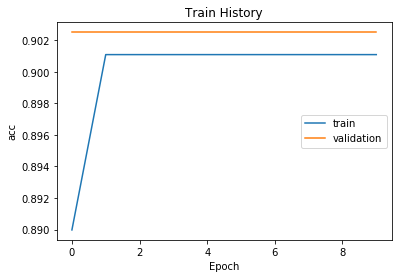

In [14]:
show_train_history(train_history_MLP, 'acc', 'val_acc')

### 分辨0-9

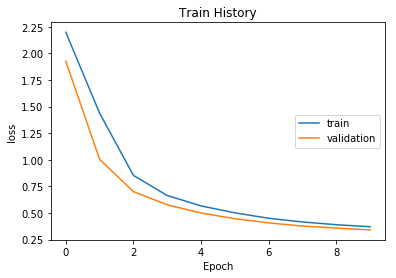

In [45]:
show_train_history(train_history_MLP2, 'loss', 'val_loss')

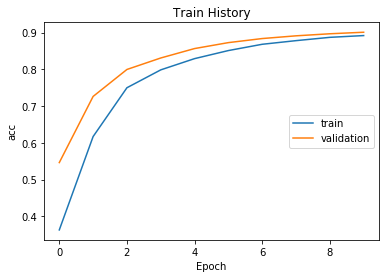

In [46]:
show_train_history(train_history_MLP2, 'acc', 'val_acc')

In [15]:
prediction = model_MLP.predict(x_Test_norm )
prediction[0]

array([0.00694644], dtype=float32)

In [21]:
prediction.shape

(10000, 1)

### Confusion Matrix

In [16]:
import pandas as pd

pd.crosstab(y_test6, prediction[:, 0], rownames=['Label'], colnames=['Predict'])

Predict,0.0003191999567206949,0.00041234149830415845,0.00049004697939381,0.0005154496757313609,0.0005177756538614631,0.0005429120501503348,0.0005489735049195588,0.0005670791724696755,0.0005676188156940043,0.000583227607421577,...,0.4962927997112274,0.49630168080329895,0.49630501866340637,0.49630942940711975,0.4963096082210541,0.49631601572036743,0.4963165819644928,0.4963430166244507,0.49634531140327454,0.49634602665901184
Label,,,,,,,,,,,,,,,,,,,,,
0.0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,5
1.0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,484


### ROC
> http://blog.changyy.org/2017/09/python-roc-receiver-operating.html

In [19]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(y_test6, prediction[:, 0])
roc_auc = auc(fpr, tpr)

In [38]:
# print(fpr)
# print(tpr)
print(roc_auc)

0.9882711577010832


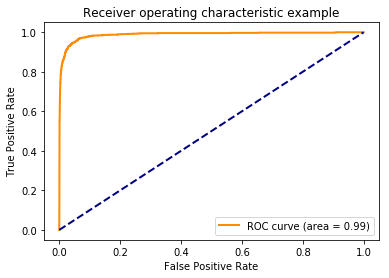

In [21]:
fig = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

In [41]:
from sklearn.metrics import f1_score
f1_score(y_test6, (prediction > 0.5).astype(int), average=None)

/anaconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.94969016, 0.        ])

### 手算TP/ TN等 (待補)

### CNN model

#### 官方推薦參數

In [55]:
model_CNN = Sequential()
model_CNN.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model_CNN.add(Conv2D(64, (3, 3), activation='relu'))
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN.add(Dropout(0.25))
model_CNN.add(Flatten())
# fully connect network
model_CNN.add(Dense(128, activation='relu'))
model_CNN.add(Dropout(0.5))
model_CNN.add(Dense(num_classes, activation='softmax'))

model_CNN.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
__________

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

train_history_CNN = model.fit(x_Train_norm, y_train_ohe,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_data=(x_test, y_test))

In [ ]:
score = model.evaluate(x_Test_norm, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### 上課EX版

In [64]:
model_CNN2 = Sequential()

# param: 1(channel)*5*3*3 + 5(bias)
model_CNN2.add(Conv2D(filters=5, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# size/ 2
model_CNN2.add(MaxPooling2D(pool_size=(2, 2)))

# 縮寫, param: 3*3*5(前filter)*10 + 10
model_CNN2.add(Conv2D(10, (3, 3), activation='relu'))
model_CNN2.add(MaxPooling2D(pool_size=(2, 2)))
model_CNN2.add(Dropout(0.25))

# param: (3*3*10)*15 + 15
model_CNN2.add(Conv2D(15, (3, 3), activation='relu'))

model_CNN2.add(Flatten())
# 15*128 + 128
model_CNN2.add(Dense(128, activation='relu'))
model_CNN2.add(Dropout(0.5))
model_CNN2.add(Dense(num_classes, activation='softmax'))

model_CNN2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 5)         50        
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 5)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 10)        460       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 10)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 5, 5, 10)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 15)          1365      
_________________________________________________________________
flatten_9 (Flatten)          (None, 135)               0         
__________

In [70]:
model_CNN2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

train_history_CNN2 = model_CNN2.fit(x=x_train, y=y_train_ohe,
                          batch_size=batch_size,
                          epochs=epochs,
                          verbose=1,
                          validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 5s 111us/step - loss: 0.8048 - acc: 0.7382 - val_loss: 0.1763 - val_acc: 0.9480
Epoch 2/12
48000/48000 [==============================] - 5s 96us/step - loss: 0.2881 - acc: 0.9121 - val_loss: 0.1246 - val_acc: 0.9620
Epoch 3/12
48000/48000 [==============================] - 5s 99us/step - loss: 0.2236 - acc: 0.9316 - val_loss: 0.1032 - val_acc: 0.9678
Epoch 4/12
48000/48000 [==============================] - 5s 98us/step - loss: 0.1913 - acc: 0.9414 - val_loss: 0.0924 - val_acc: 0.9714
Epoch 5/12
48000/48000 [==============================] - 5s 98us/step - loss: 0.1718 - acc: 0.9471 - val_loss: 0.0820 - val_acc: 0.9746
Epoch 6/12
48000/48000 [==============================] - 5s 99us/step - loss: 0.1614 - acc: 0.9503 - val_loss: 0.0755 - val_acc: 0.9775
Epoch 7/12
48000/48000 [==============================] - 5s 100us/step - loss: 0.1472 - acc: 0.9556 - val_loss: 0.0752 - val_a

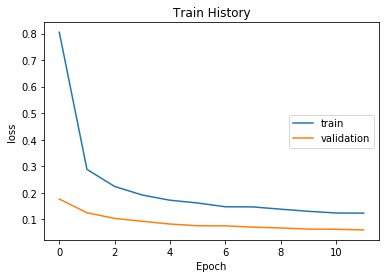

In [71]:
show_train_history(train_history_CNN2, 'loss', 'val_loss')

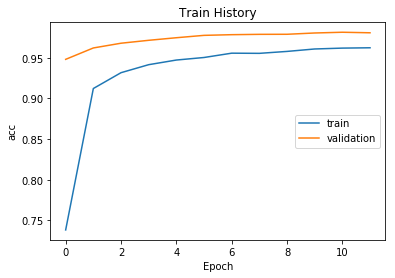

In [72]:
show_train_history(train_history_CNN2, 'acc', 'val_acc')

### 參數計算練習

In [74]:
model_CNN3 = Sequential()

# conv output = input_size - kernel_size + 1

# 3(rgb)*8*4*4* + 8 =392
model_CNN3.add(Conv2D(filters=8, kernel_size=(4, 4),
                 activation='relu',
                 input_shape=(28,28,3)))
# size/ 2
model_CNN3.add(MaxPooling2D(pool_size=(2, 2)))

# 縮寫, 8*(2*3*12) +12 
model_CNN3.add(Conv2D(12, (2, 3), activation='relu'))
model_CNN3.add(MaxPooling2D(pool_size=(2, 2)))

# param: (4*3*16)*12 + 16 = 2320
model_CNN3.add(Conv2D(16, (4, 3), activation='relu'))
model_CNN3.add(MaxPooling2D(pool_size=(2, 2)))

model_CNN3.add(Flatten())
# 100*16 + 100
model_CNN3.add(Dense(100, activation='relu'))
# 100*10 + 10
model_CNN3.add(Dense(num_classes, activation='softmax'))

model_CNN3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 25, 25, 8)         392       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 11, 10, 12)        588       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 12)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 2, 3, 16)          2320      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 1, 1, 16)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 16)                0         
__________

### 預測

In [77]:
CNN_prediction = model_CNN2.predict_classes(x_test)
pd.crosstab(y_test, CNN_prediction, rownames=['Label'], colnames=['Predict'])

Predict,0,1,2,3,4,5,6,7,8,9
Label,,,,,,,,,,
0,976,0,1,0,0,0,0,1,2,0
1,0,1128,1,1,0,0,1,2,2,0
2,1,1,1017,2,1,0,0,6,4,0
3,0,0,2,997,0,3,0,6,2,0
4,1,2,1,1,963,0,1,1,2,10
5,2,0,0,14,0,871,1,1,1,2
6,9,3,1,0,1,3,939,0,2,0
7,2,3,9,5,0,0,0,1005,1,3
8,7,0,4,5,0,3,0,6,942,7


In [78]:
# 反轉one hot回來
np.argmax(y_test_ohe, axis=1)

array([7, 2, 1, ..., 4, 5, 6])

### 印預測與實際的比較

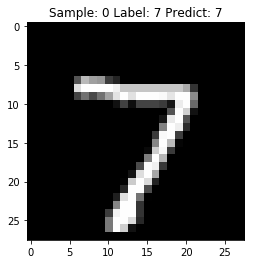

In [79]:
def print_predict(num):
    label = y_test_ohe[num].argmax(axis=0)
    image = x_test[num].reshape([28, 28])
    predict = CNN_prediction[num]
    plt.title('Sample: %d Label: %d Predict: %d' % (num, label, predict))
    plt.imshow(image, cmap='gray')
    
print_predict(0)